In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Load the data.

Transaction data frame contain detail of all transacion.
Fraud data frame contain a list of fraudster
Users data frame contain information of the user.

In [34]:
transaction = pd.read_csv("../data/train_transactions.csv",index_col = 0)
fraud = pd.read_csv("../data/train_fraudsters.csv",index_col = 0)
users = pd.read_csv("../data/train_users.csv",index_col = 0)
transaction.Fraud = transaction.Fraud.apply(lambda x: 0 if x== "0" else 1)

## Transaction dataframe

In [13]:
transaction.head()

,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID,Fraud
0,GBP,3738,COMPLETED,05:43.0,bar,AUS,misc,7285c1ec-31d0-4022-b311-0ad9227ef7f4,CARD_PAYMENT,GAIA,5a9ee109-e9b3-4598-8dd7-587591e6a470,0
1,GBP,588,COMPLETED,08:39.1,NaN,CA,misc,20100a1d-12bc-41ed-a5e1-bc46216e9696,CARD_PAYMENT,GAIA,28d68bf4-460b-4c8e-9b95-bcda9ab596b5,0
2,GBP,1264,COMPLETED,37:40.9,NaN,UKR,misc,0fe472c9-cf3e-4e43-90f3-a0cfb6a4f1f0,CARD_PAYMENT,GAIA,1f1e8817-d40b-4c09-b718-cfc4a6f211df,0
3,GBP,66,REVERTED,08:35.3,NaN,CA,misc,20100a1d-12bc-41ed-a5e1-bc46216e9696,CARD_PAYMENT,GAIA,a7aaf78c-d201-456f-9e6d-612a795e8c32,0
4,GBP,968,COMPLETED,46:47.6,supermarket,NZL,misc,821014c5-af06-40ff-91f4-77fe7667809f,CARD_PAYMENT,GAIA,27dd99a2-5539-4ba9-876a-1a94abc2701f,0


The column State looks like leakage, will not use it in model

### Missing Data

In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688651 entries, 0 to 688650
Data columns (total 13 columns):
Unnamed: 0           688651 non-null int64
CURRENCY             688651 non-null object
AMOUNT               688651 non-null int64
STATE                688651 non-null object
CREATED_DATE         688651 non-null object
MERCHANT_CATEGORY    223065 non-null object
MERCHANT_COUNTRY     483073 non-null object
ENTRY_METHOD         688651 non-null object
USER_ID              688651 non-null object
TYPE                 688651 non-null object
SOURCE               688651 non-null object
ID                   688651 non-null object
Fraud                688651 non-null object
dtypes: int64(2), object(11)
memory usage: 68.3+ MB


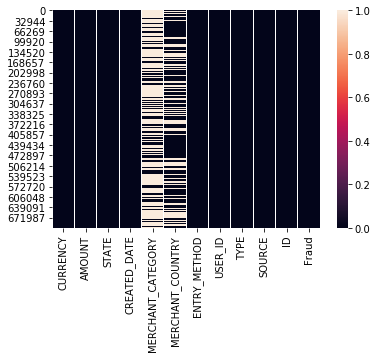

In [9]:
sns.heatmap(transaction.isna())

### Numberical features

MERCHANT_CATEGORY has alot of missing data, MERCHANT_COUNTRY has about 30% missing data as well.

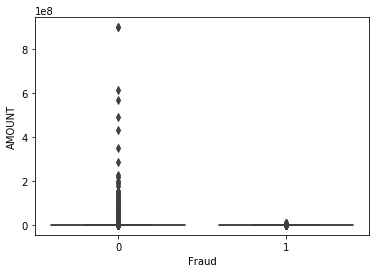

In [8]:
sns.boxplot(transaction.Fraud,transaction.AMOUNT)

Look at the box plot of the transaction amount, it looks like there is a lot of outliers.

### Catergorical Features

In [3]:
fraudster = transaction[transaction.Fraud == 1]
normal = transaction[transaction.Fraud == 0]

In [4]:
def check_percentage(column):
    """
    Return the percentage of catergorical variable in each column for fraud trasaction and regular transaction
    input: 
    """
    print("Fraudster:\n",fraudster[column].value_counts().head(6) /len(fraudster))
    print("\n")
    print("Not_Fraud:\n",normal[column].value_counts().head(6) /len(normal))

In [58]:
check_percentage("CURRENCY")

Fraudster:
 GBP    0.909372
EUR    0.049027
PLN    0.020147
USD    0.012308
NOK    0.007908
RON    0.000894
Name: CURRENCY, dtype: float64


Not_Fraud:
 GBP    0.483403
EUR    0.391602
USD    0.046525
PLN    0.032738
RON    0.008640
CHF    0.008545
Name: CURRENCY, dtype: float64


Fraudster has over 90% transaction is in GBP

In [18]:
check_percentage("MERCHANT_CATEGORY")

Fraudster:
 atm                  0.065392
point_of_interest    0.061198
supermarket          0.031011
restaurant           0.015128
bank                 0.014302
convenience_store    0.014027
Name: MERCHANT_CATEGORY, dtype: float64


Not_Fraud:
 point_of_interest    0.056251
supermarket          0.044644
restaurant           0.035002
cafe                 0.019366
bar                  0.019166
atm                  0.014510
Name: MERCHANT_CATEGORY, dtype: float64


For Fraudster, atm transaction percentage is more than 4 times as none fraud transaction.

In [6]:
check_percentage("MERCHANT_COUNTRY")

Fraudster:
 GBR    0.455958
IRL    0.023723
POL    0.019460
NLD    0.018703
USA    0.017809
NOR    0.012652
Name: MERCHANT_COUNTRY, dtype: float64


Not_Fraud:
 GBR    0.207042
USA    0.067928
FRA    0.042806
IRL    0.038348
LTU    0.037708
ESP    0.034417
Name: MERCHANT_COUNTRY, dtype: float64


For Fraudster, Great Britan percentage is more than 2 times as none fraud transaction.

In [8]:
check_percentage("ENTRY_METHOD")

Fraudster:
 misc    0.394760
manu    0.241835
chip    0.231245
cont    0.129616
mags    0.002407
mcon    0.000138
Name: ENTRY_METHOD, dtype: float64


Not_Fraud:
 misc    0.328762
chip    0.267463
cont    0.235848
manu    0.134155
mags    0.033045
mcon    0.000727
Name: ENTRY_METHOD, dtype: float64


For Fraudster, manu percentage is almost 2 times as none fraud transaction.

In [9]:
check_percentage("TYPE")

Fraudster:
 CARD_PAYMENT     0.470948
TOPUP            0.260744
ATM              0.153751
BANK_TRANSFER    0.084577
P2P              0.029980
Name: TYPE, dtype: float64


Not_Fraud:
 CARD_PAYMENT     0.637466
TOPUP            0.191021
P2P              0.082927
ATM              0.066885
BANK_TRANSFER    0.021700
Name: TYPE, dtype: float64


For Fraudster, bank transfer percentage is almost 4 times as none fraud transaction.

In [11]:
check_percentage("SOURCE")

Fraudster:
 GAIA        0.624699
MINOS       0.200165
HERA        0.120195
INTERNAL    0.029980
LETO        0.009695
CRONUS      0.008045
Name: SOURCE, dtype: float64


Not_Fraud:
 GAIA        0.704258
HERA        0.169606
INTERNAL    0.083030
MINOS       0.012083
LETO        0.010079
CRONUS      0.008933
Name: SOURCE, dtype: float64


For Fraudster, minos percentage is more than 15 times as none fraud transaction.

### Users Data Set

In [13]:
users.head()

,FAILED_SIGN_IN_ATTEMPTS,KYC,BIRTH_YEAR,COUNTRY,STATE,CREATED_DATE,TERMS_VERSION,PHONE_COUNTRY,HAS_EMAIL,ID
0,0,PASSED,1971,GB,ACTIVE,2017-08-06 07:33:33.341000,2018-05-25,GB||JE||IM||GG,1,1872820f-e3ac-4c02-bdc7-727897b60043
1,0,PASSED,1982,GB,ACTIVE,2017-03-07 10:18:59.427000,2018-01-01,GB||JE||IM||GG,1,545ff94d-66f8-4bea-b398-84425fb2301e
2,0,PASSED,1973,ES,ACTIVE,2018-05-31 04:41:24.672000,2018-09-20,ES,1,10376f1a-a28a-4885-8daa-c8ca496026bb
3,0,PASSED,1986,FR,ACTIVE,2018-06-01 17:24:23.852000,2018-05-25,FR,1,fd308db7-0753-4377-879f-6ecf2af14e4f
4,0,PASSED,1989,GB,ACTIVE,2017-08-09 15:03:33.945000,2018-09-20,GB||JE||IM||GG,1,755fe256-a34d-4853-b7ca-d9bb991a86d3


In [35]:
users.PHONE_COUNTRY = users.PHONE_COUNTRY.apply(lambda x: x.split("||"))
users["phone"] = users.PHONE_COUNTRY.apply(lambda x: len(x))
users = pd.merge(users,fraud,how="left",left_on="ID",right_on = "user_id")
users["is_fraud"] = users.user_id.apply(lambda x:0 if x is np.nan else 1)

covert phone country column to a list, create column phone which is the count of element in the phone country list

merge with the fraud dataframe to identify whcich user is fraud

In [38]:
users[users.is_fraud == 1].KYC.value_counts()/ len(users[users.is_fraud == 1])

PASSED     0.866667
FAILED     0.073333
PENDING    0.056667
NONE       0.003333
Name: KYC, dtype: float64

In [39]:
users[users.is_fraud == 0].KYC.value_counts() / len(users[users.is_fraud == 0])

PASSED     0.6906
NONE       0.2763
FAILED     0.0270
PENDING    0.0061
Name: KYC, dtype: float64

Fraud user tend to have KYC of failed and pending,and no nearly no None, which is the status of identification process.

In [42]:
users[users.is_fraud == 1].phone.value_counts()/ len(users[users.is_fraud == 1])

4    0.880000
1    0.113333
3    0.006667
Name: phone, dtype: float64

In [43]:
users[users.is_fraud == 0].phone.value_counts() / len(users[users.is_fraud == 0])

1    0.5583
4    0.4270
3    0.0082
2    0.0065
Name: phone, dtype: float64

Fraud user tend to have length of phone to be 4.

In [50]:
fraud = users[users.is_fraud == 1]
not_fraud = users[users.is_fraud == 0]

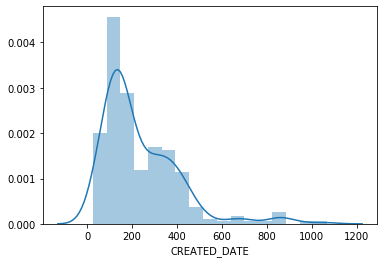

In [56]:
sns.distplot((pd.to_datetime(users.CREATED_DATE).max() - pd.to_datetime(fraud.CREATED_DATE)).dt.days);

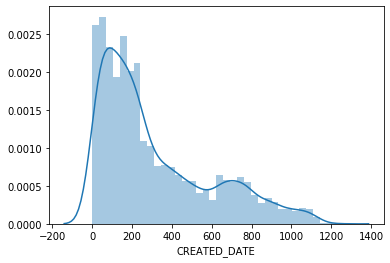

In [57]:
sns.distplot((pd.to_datetime(users.CREATED_DATE).max() - pd.to_datetime(not_fraud.CREATED_DATE)).dt.days);

For both group, user account age seems to have similar distribution, user that are not fraud had a fatter tail.